In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("KNN_Project_Data")

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


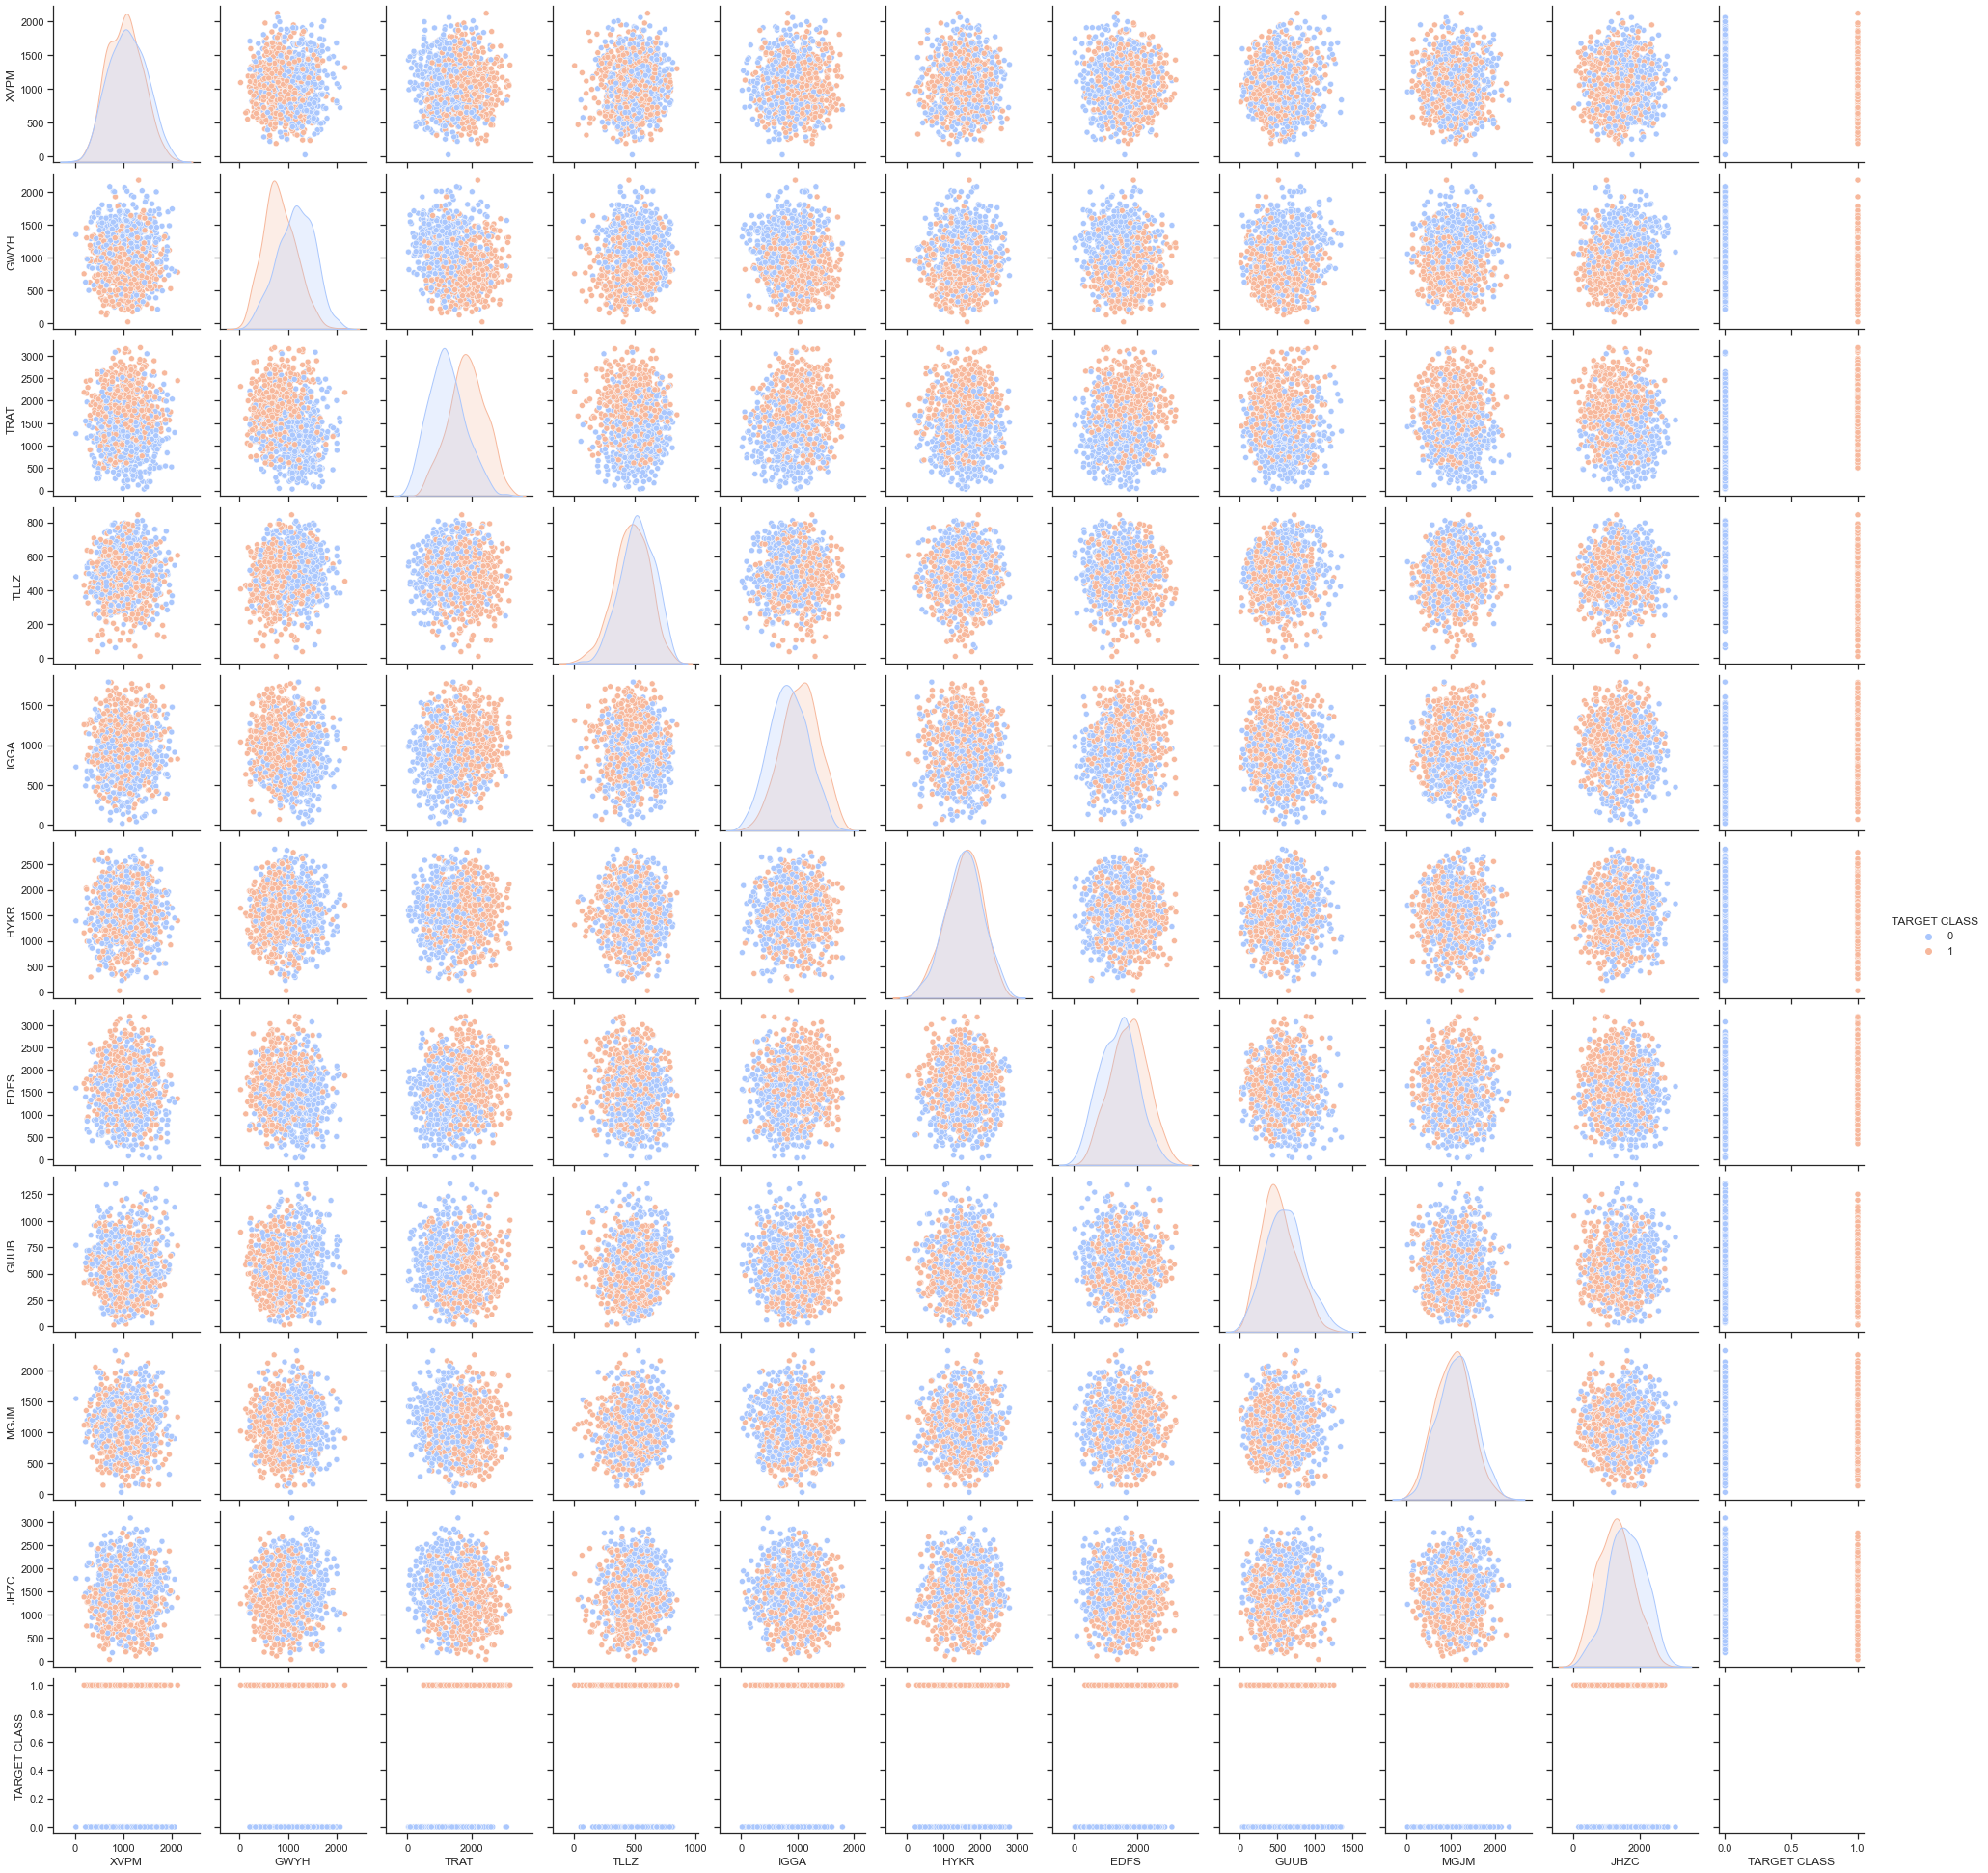

In [18]:
sns. set(style="ticks", color_codes=True)
sns.pairplot(df, hue="TARGET CLASS", vars = list(df.columns), palette='coolwarm')

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler()

In [23]:
scaled_features = scaler.transform(df.drop("TARGET CLASS", axis=1))

In [32]:
dat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df["TARGET CLASS"], test_size=0.3)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [41]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
predictions = knn_model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

Confusion Matrix 
 [[101  42]
 [ 47 110]]


In [54]:
print("Classification Report \n", classification_report(y_test, predictions))

Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.71      0.69       143
           1       0.72      0.70      0.71       157

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



Text(0, 0.5, 'Error Rate')

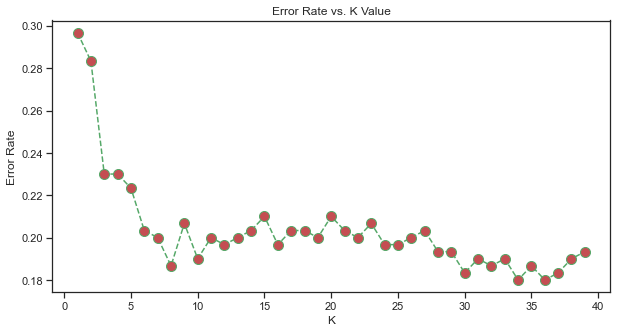

In [85]:
error_rate = []

for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))

plt.figure(figsize=(10,5))
plt.plot(range(1,40), error_rate, color="g", marker="o", ls="--", markerfacecolor="r", markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [86]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model_n = KNeighborsClassifier(n_neighbors=30)

In [88]:
knn_model.fit(X_train, y_train)
knn_model_n.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [89]:
predictions = knn_model.predict(X_test)
predictions_n = knn_model_n.predict(X_test)

In [91]:
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))
print("\n Classification Report \n", classification_report(y_test, predictions))

Confusion Matrix 
 [[101  42]
 [ 47 110]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.71      0.69       143
           1       0.72      0.70      0.71       157

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



In [92]:
print("Confusion Matrix \n", confusion_matrix(y_test, predictions_n))
print("\n Classification Report \n", classification_report(y_test, predictions_n))

Confusion Matrix 
 [[113  30]
 [ 25 132]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       143
           1       0.81      0.84      0.83       157

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

